Build a recommender system by using cosine simillarties score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#displays the maximun no of columns (upto 40)
#pd.set_option("display.max_rows",40)

In [3]:
book_df = pd.read_csv('/content/book.csv', encoding='latin-1')

In [4]:
book_df

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [5]:
book_df.sample(5)

,Unnamed: 0,User.ID,Book.Title,Book.Rating
6633,6634,3373,How to Learn Astrology,5
8753,8754,161252,The Wise And Foolish Virgins,10
709,710,277427,America the Beautiful: A Novel,7
3242,3243,726,"Mossflower (Redwall, Book 2)",10
0,1,276726,Classical Mythology,5


In [6]:
book_df.isna().sum() #null values

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [7]:
book_df.nunique()   # 10000 does not mean, that many users exists, coz a particular user can read more than one book, unique users =2182

Unnamed: 0     10000
User.ID         2182
Book.Title      9659
Book.Rating       10
dtype: int64

In [8]:
book_df['User.ID'].duplicated().sum()  #unque users=2182

7818

In [9]:
 book_df.groupby(['User.ID'])['Book.Title'].count()

User.ID
8          7
9          1
10         1
12         1
14         3
          ..
278846     1
278849     1
278851    14
278852     1
278854     6
Name: Book.Title, Length: 2182, dtype: int64

In [10]:
filtered_counts = book_df.groupby(['User.ID'])['Book.Title'].count()
greater_than_1_counts = filtered_counts[filtered_counts > 1]
greater_than_1_counts

User.ID
8          7
14         3
17         4
26         2
39         2
          ..
278832     3
278843    20
278844     3
278851    14
278854     6
Name: Book.Title, Length: 859, dtype: int64

### There are 859 users who read more than 1 book

In [11]:
book_df["Book.Rating"].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Book.Rating, dtype: int64

### Eg. About 2282 books got ratings as 8

<Axes: >

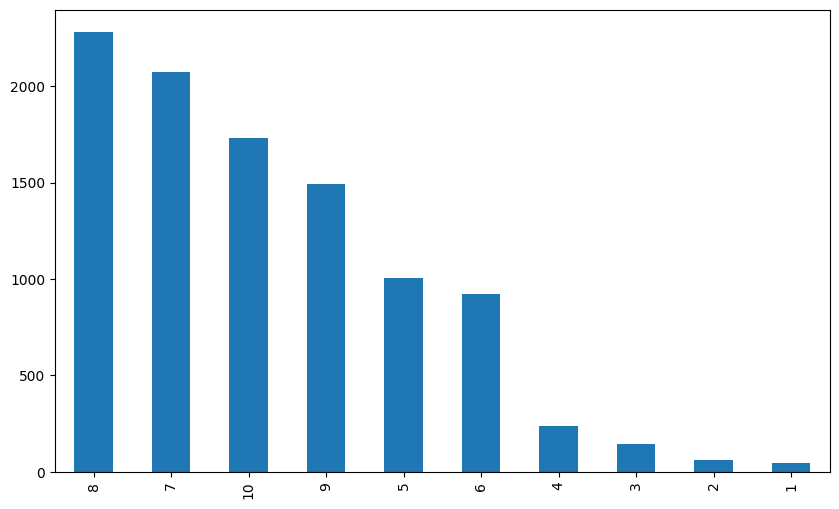

In [12]:
plt.figure(figsize=(10,6))
book_df["Book.Rating"].value_counts().plot(kind="bar")


In [13]:
book_df.shape

(10000, 4)

In [14]:
book_df[book_df["User.ID"]==162121]

,Unnamed: 0,User.ID,Book.Title,Book.Rating
9990,9991,162121,The Cloister Walk,7
9991,9992,162121,Open Water,5
9992,9993,162121,The Evolution of Jane,8
9993,9994,162121,AT PARADISE GATE,8
9994,9995,162121,I Should Have Stayed Home: The Worst Trips of ...,8
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


### The user 162121 has read these 9 books

In [15]:
book_df[book_df["User.ID"]==8]

,Unnamed: 0,User.ID,Book.Title,Book.Rating
2399,2400,8,Ancient Celtic Romances,5
2400,2401,8,The Western way: A practical guide to the West...,5
2401,2402,8,Wings,5
2402,2403,8,Truckers,5
2403,2404,8,Keepers of the Earth Teachers Guide,6
2404,2405,8,The Celts Activity Book,6
2405,2406,8,The Art Of Celtia,7


### The user 8 has read these 7 books

In [16]:
book_df[book_df["User.ID"]==276729]


,Unnamed: 0,User.ID,Book.Title,Book.Rating
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6


###  The user 276729 has read these 2 *books*

In [17]:
rating_1=book_df[book_df['Book.Rating'] == 1]
rating_1

,Unnamed: 0,User.ID,Book.Title,Book.Rating
115,116,276853,A Kiss Remembered,1
640,641,277363,Children of the Night,1
1442,1443,278024,Saucer,1
1717,1718,278202,Catechism of the Catholic Church,1
2107,2108,278540,Anam Cara : A Book of Celtic Wisdom,1
2231,2232,278633,The Selfish Gene,1
2294,2295,278683,Having Our Say: The Delany Sisters' First 100 ...,1
2320,2321,278755,"The Elements of Style, Fourth Edition",1
2321,2322,278759,How to Say It Style Guide,1
3900,3901,1314,Fatal Care,1


In [18]:
rating_1.shape

(43, 4)

### These 43 books got rating 1

In [19]:
#book_df.groupby(['Book.Title'])['Book.Rating'].count().sample(5)


In [20]:
book_df.groupby(['Book.Title'])['Book.Rating'].mean().sample(3)

Book.Title
Affliction                                        10.0
Selected Short Stories of Sinclair Lewis (Rep)     9.0
Casebook of the Black Widowers                    10.0
Name: Book.Rating, dtype: float64

In [21]:
book_df[book_df["Book.Title"]=="stardust"]

,Unnamed: 0,User.ID,Book.Title,Book.Rating
835,836,277439,stardust,5


In [22]:
#user_book_df=book_df.pivot(index='Unnamed : 0',columns='Book.Title',values='Book.Rating')



In [23]:
books_df=book_df.reset_index().pivot_table(values="Book.Rating", index=['User.ID'], columns='Book.Title')


In [24]:
books_df

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [25]:
book_df[book_df["User.ID"]==278851]

,Unnamed: 0,User.ID,Book.Title,Book.Rating
2378,2379,278851,So You Want to Be a Stay-At-Home Mom,5
2379,2380,278851,Black Notice,5
2380,2381,278851,Mystic River,5
2381,2382,278851,Hitched,7
2382,2383,278851,Fantastic Imagination,5
2383,2384,278851,Six of Swords,5
2384,2385,278851,Paradise Wild,7
2385,2386,278851,iI Paradiso Degli Orchi,7
2386,2387,278851,The Celestine Prophecy : An Experiential Guide,5
2387,2388,278851,Huis Clos Suivi de Les Mouches (Folio Ser. No....,7


In [26]:
filtered_user_rating = book_df[(book_df["User.ID"] == 278851) & (book_df["Book.Rating"] == 7)] #iI Paradiso Degli Orchi
filtered_user_rating

,Unnamed: 0,User.ID,Book.Title,Book.Rating
2381,2382,278851,Hitched,7
2384,2385,278851,Paradise Wild,7
2385,2386,278851,iI Paradiso Degli Orchi,7
2387,2388,278851,Huis Clos Suivi de Les Mouches (Folio Ser. No....,7
2391,2392,278851,Pay It Forward: A Novel,7


### The user id=278851 has given a rating of 7 to the book iI Paradiso Degli Orchi

In [27]:
books_df.values    #book_df.reset

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ...,  7., nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [28]:
#book_df.set_index(['User.ID'], append=True)

In [29]:
#Impute those NaNs with 0 values
books_df.fillna(0, inplace=True)
books_df

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [30]:
book_df[book_df["User.ID"]==278854]

,Unnamed: 0,User.ID,Book.Title,Book.Rating
2393,2394,278854,A corrente de Trewis Scott,7
2394,2395,278854,As valkÃ­rias,7
2395,2396,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2396,2397,278854,Blast From the Past,7
2397,2398,278854,"A Treasury of Irish Myth, Legend, and Folklore",6
2398,2399,278854,Celtic Mythology (Library of the World's Myths...,8


## cosine similarity

In [31]:
#To calculate the cosine similarity betwn the users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [32]:
user_sim = 1- pairwise_distances( books_df.values, metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [33]:
user_sim_df=pd.DataFrame(user_sim) #to store the results in a dataframe


In [34]:
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
user_sim_df.shape

(2182, 2182)

In [36]:
user_sim_df.index= books_df.index
user_sim_df.columns= books_df.index

In [37]:
user_sim_df

User.ID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
User.ID,,,,,,,,,,,,,,,,,,,,,
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
np.fill_diagonal(user_sim,1)
user_sim_df.iloc[100:200, 200:210]

User.ID,757,758,759,763,765,767,769,771,774,776
User.ID,,,,,,,,,,
382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
user_sim_df[162121]

User.ID
8         0.0
9         0.0
10        0.0
12        0.0
14        0.0
         ... 
278846    0.0
278849    0.0
278851    0.0
278852    0.0
278854    0.0
Name: 162121, Length: 2182, dtype: float64

In [40]:
user_sim_df.sort_values([278844],ascending=False).head(100)

User.ID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
User.ID,,,,,,,,,,,,,,,,,,,,,
278844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0
276813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.228717,0.0,0.0,0.0,0.0,0.0
161373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.195515,0.0,0.0,0.0,0.0,0.0
161778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
161777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
161443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
161441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [41]:
user_sim_df[user_sim_df[278844]>0.19]

User.ID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
User.ID,,,,,,,,,,,,,,,,,,,,,
161373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.195515,0.0,0.0,0.0,0.0,0.0
276813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.228717,0.0,0.0,0.0,0.0,0.0
278844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0


In [42]:
book_df[(book_df['User.ID']==278844) | (book_df['User.ID']==276813)]

,Unnamed: 0,User.ID,Book.Title,Book.Rating
44,45,276813,Icebound,8
45,46,276813,I'll Be Seeing You,8
46,47,276813,From the Corner of His Eye,6
47,48,276813,Isle of Dogs,8
48,49,276813,Purity in Death,6
49,50,276813,This Year It Will Be Different: And Other Stories,6
50,51,276813,Proxies,8
2373,2374,278844,Icebound,6
2374,2375,278844,Young Wives,7
2375,2376,278844,The Berlin Stories: The Last of Mr. Norris and...,6


In [43]:
from collections import Counter

def get_reco(customer_id):

        try :
            tem=list(user_sim_df.sort_values([customer_id],ascending=False).head(150).index)
            book_list=list(book_df[book_df["User.ID"].isin(tem)]["Book.Title"])
             #print(movie_list)
            #recommended_books=set(book_list)-set(book_df[book_df["User.ID"]==customer_id]["book"])
            recommended_books= Counter(book_list).most_common()
            if recommended_books==set():
                return  "please look for more similar customer"
            return recommended_books

        except :
            return " the user id isn't available"


In [44]:
get_reco(162121)

[('Mrs. Mike', 2),
 ('Charlie and the Chocolate Factory', 2),
 ('Pacific Northwest', 1),
 ('A Soldier of the Great War', 1),
 ('Getting Well Again', 1),
 ('Northwest Wines and Wineries', 1),
 ('An Atmosphere of Eternity: Stories of India', 1),
 ('LONESOME DOVE', 1),
 ('Shabanu: Daughter of the Wind (Border Trilogy)', 1),
 ('Haveli (Laurel Leaf Books)', 1),
 ('Lieux dits', 1),
 ('The Dragons of Eden: Speculations on the Evolution of Human Intelligence',
  1),
 ('The yawning heights', 1),
 ('Breathing Lessons', 1),
 ('The Joy Luck Club', 1),
 ('Heart of Darkness (Wordsworth Collection)', 1),
 ('The Angel Is Near', 1),
 ('The Tao of Pooh', 1),
 ('Seabiscuit', 1),
 ('The Prince', 1),
 ("Life's Little Instruction Book (Life's Little Instruction Books (Paperback))",
  1),
 ('Starship Troopers', 1),
 ('The Ruby in the Smoke (Sally Lockhart Trilogy, Book 1)', 1),
 ('Black Beauty (Illustrated Classics)', 1),
 ("Anil's Ghost", 1),
 ('Prescription for Terror', 1),
 ('Modern Manners: An Etiquette 

In [45]:
get_reco(278844)

[('Icebound', 2),
 ('Young Wives', 2),
 ('Mrs. Mike', 2),
 ('Charlie and the Chocolate Factory', 2),
 ("I'll Be Seeing You", 1),
 ('From the Corner of His Eye', 1),
 ('Isle of Dogs', 1),
 ('Purity in Death', 1),
 ('This Year It Will Be Different: And Other Stories', 1),
 ('Proxies', 1),
 ('Pacific Northwest', 1),
 ('A Soldier of the Great War', 1),
 ('Getting Well Again', 1),
 ('Northwest Wines and Wineries', 1),
 ('An Atmosphere of Eternity: Stories of India', 1),
 ('LONESOME DOVE', 1),
 ('Shabanu: Daughter of the Wind (Border Trilogy)', 1),
 ('Haveli (Laurel Leaf Books)', 1),
 ('Lieux dits', 1),
 ('The Dragons of Eden: Speculations on the Evolution of Human Intelligence',
  1),
 ('The yawning heights', 1),
 ('Breathing Lessons', 1),
 ('The Joy Luck Club', 1),
 ('Heart of Darkness (Wordsworth Collection)', 1),
 ('The Angel Is Near', 1),
 ('The Prince', 1),
 ("Life's Little Instruction Book (Life's Little Instruction Books (Paperback))",
  1),
 ('Starship Troopers', 1),
 ('The Ruby in 

In [46]:
get_reco(5)

" the user id isn't available"

In [47]:
 # #This line sorts the rows of a DataFrame user_sim_df based on the similarity of each user to the input customer_id. It selects the top 150 similar users and retrieves their indices.
 #tem=list(user_sim_df.sort_values([162121],ascending=False).head(150).index)


In [48]:
  #book_list=list(book_df[book_df["User.ID"].isin(tem)]["Book.Title"])
  #This line fetches the titles of books rated by the top 150 similar users (identified by tem) from the DataFrame book_df. It uses the isin() method to filter rows where the 'User.ID' is in tem.


In [49]:
#This line creates a counter object recommended_books to count the occurrences of each book title in the book_list. It then retrieves the most common books.
#recommended_books= Counter(book_list).most_common()

In [50]:
#jaccard similarity understanding
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Example usage
set1 = {1, 2, 3, 4}
set2 = {3, 4, 5, 6}
print("Jaccard Similarity:", jaccard_similarity(set1, set2))


Jaccard Similarity: 0.3333333333333333
